Aishik Mandal(18EC3AI21)
## Question 10

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
import numpy as np
(x_train, y_train) , (x_test, y_test) = mnist.load_data()
print("Shape of training sample input " , np.shape(x_train))
print("Shape of training sample output " , np.shape(y_train))
print("Shape of test sample input " , np.shape(x_test))
print("Shape of test sample output " , np.shape(y_test))

Shape of training sample input  (60000, 28, 28)
Shape of training sample output  (60000,)
Shape of test sample input  (10000, 28, 28)
Shape of test sample output  (10000,)


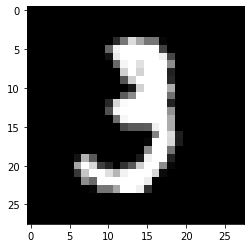

In [24]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10], cmap = 'gray')

For each of the digit 0, 1, . . . , 9 randomly select 1000 images
to generate a training data set of size 10000 images. Similarly generate a test
data set of 1000 images as a test data set.

In [4]:
X = np.reshape(x_train, (60000,784))
Y = y_train
print(X[0])
print(Y[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [5]:
# ok so we can add the digits one by one, so first adding 1000 '0' images then 1000 '1' images and so on
x_th = []
y_th = []
for dig in range(10):
    print("Doing it for the digit : " ,dig)
    num = 0
    for i in range(len(Y)):
        if Y[i] == dig:
            x_th.append(X[i]/255)
            y_th.append(dig)
            num += 1
            if num >= 1000:
                break

Doing it for the digit :  0
Doing it for the digit :  1
Doing it for the digit :  2
Doing it for the digit :  3
Doing it for the digit :  4
Doing it for the digit :  5
Doing it for the digit :  6
Doing it for the digit :  7
Doing it for the digit :  8
Doing it for the digit :  9


In [6]:
print("Size of x_th is ", np.shape(x_th) , " and size of y_th is ", np.shape(y_th) )

Size of x_th is  (10000, 784)  and size of y_th is  (10000,)


Now, for the test set. 

In [7]:
#We can add the digits one by one, so first adding 100 '0' images then 100 '1' images and so on
X_t = np.reshape(x_test, (10000,784))
x_hund = []
y_hund = []
for dig in range(10):
    print("Doing it for the digit : " ,dig)
    num = 0
    for i in range(len(y_test)):
        if y_test[i] == dig:
            x_hund.append(X_t[i]/255)
            y_hund.append(dig)
            num += 1
            if num >= 100:
                break

Doing it for the digit :  0
Doing it for the digit :  1
Doing it for the digit :  2
Doing it for the digit :  3
Doing it for the digit :  4
Doing it for the digit :  5
Doing it for the digit :  6
Doing it for the digit :  7
Doing it for the digit :  8
Doing it for the digit :  9


In [8]:
print("Size of test_set_X is ", np.shape(x_hund) , " and size of y_hund is ", np.shape(y_hund) )

Size of test_set_X is  (1000, 784)  and size of y_hund is  (1000,)


Fitting a linear least squares classifier to
classify the data set into 10 classes and test prediction accuracy of the model
using the 10 × 10 confusion matrix. Do not use any inbuit functions for fitting
the model.

In [9]:
y_sep = [[],[],[],[],[],[],[],[],[],[]]
for i in range(10):
    for j in range(len(y_th)) :
        val = -1
        if y_th[j] == i :
            val = 1 
        y_sep[i].append(val)

In [10]:
pseudo_inv = np.dot((np.linalg.pinv(np.dot(np.transpose(x_th), x_th))), np.transpose(x_th))

In [11]:
theta = [[],[],[],[],[],[],[],[],[],[]]
for i in range(10) :
    theta[i] = np.dot(pseudo_inv, y_sep[i])

In [12]:
y_hat = [[],[],[],[],[],[],[],[],[],[]]
for i in range(10):
    y_hat[i] = np.dot(x_th, theta[i])

In [13]:
y_tilde = []
for i in range(len(x_th)) :
    maxval = -10
    maxind = 0
    for j in range(10) :  
        if y_hat[j][i] > maxval :
            maxval = y_hat[j][i] 
            maxind = j
    y_tilde.append(maxind)

In [14]:
print(y_tilde) # these are the predictions

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 

In [15]:
# create the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
       
    df_cm = pd.DataFrame(cm, index = classes,
                  columns = classes)
    sns.heatmap(df_cm, annot=True, cmap = cmap)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)

In [17]:
print(confusion_matrix(y_th, y_tilde, labels=[0,1,2,3,4,5,6,7,8,9]))
# Printing the precision and recall, among other metrics
print(classification_report(y_th, y_tilde, labels=[0,1,2,3,4,5,6,7,8,9]))

[[966   2   3   5   2   4   7   0  10   1]
 [  1 970   6   1   2   5   0   0  14   1]
 [ 11  42 837  25  13   2  29   7  31   3]
 [  2  26  29 859   7  20   5  16  12  24]
 [  0  16   8   2 896   7   8   5   5  53]
 [ 21   9   2  73   8 770  27   4  68  18]
 [ 11   5  10   0   7  15 945   0   7   0]
 [  7  22   5   3  26   0   0 880   1  56]
 [ 20  69   7  18  20  30  16   3 794  23]
 [  7   7   6  16  38   2   0  57  12 855]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1000
           1       0.83      0.97      0.89      1000
           2       0.92      0.84      0.88      1000
           3       0.86      0.86      0.86      1000
           4       0.88      0.90      0.89      1000
           5       0.90      0.77      0.83      1000
           6       0.91      0.94      0.93      1000
           7       0.91      0.88      0.89      1000
           8       0.83      0.79      0.81      1000
           9       0.83     

Confusion matrix, without normalization
[[966   2   3   5   2   4   7   0  10   1]
 [  1 970   6   1   2   5   0   0  14   1]
 [ 11  42 837  25  13   2  29   7  31   3]
 [  2  26  29 859   7  20   5  16  12  24]
 [  0  16   8   2 896   7   8   5   5  53]
 [ 21   9   2  73   8 770  27   4  68  18]
 [ 11   5  10   0   7  15 945   0   7   0]
 [  7  22   5   3  26   0   0 880   1  56]
 [ 20  69   7  18  20  30  16   3 794  23]
 [  7   7   6  16  38   2   0  57  12 855]]


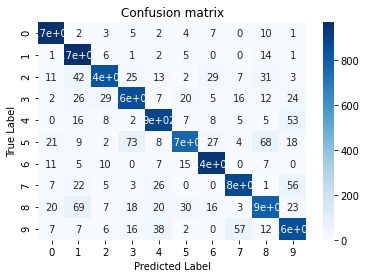

In [18]:
plot_confusion_matrix(confusion_matrix(y_th, y_tilde, labels=[0,1,2,3,4,5,6,7,8,9]) , classes = [0,1,2,3,4,5,6,7,8,9])

Next, we check for the test set

In [19]:
y_sep2 = [[],[],[],[],[],[],[],[],[],[]]
for i in range(10):
    for j in range(len(y_hund)) :
        val = -1
        if y_hund[j] == i :
            val = 1 
        y_sep2[i].append(val)

In [20]:
y_hat2 = [[],[],[],[],[],[],[],[],[],[]]
for i in range(10):
    y_hat2[i] = np.dot(x_hund, theta[i])

In [21]:
y_tilde2 = []
for i in range(len(x_hund)) :
    maxval = -10
    maxind = 0
    for j in range(10) :  
        if y_hat2[j][i] > maxval :
            maxval = y_hat2[j][i] 
            maxind = j
    y_tilde2.append(maxind)

In [22]:
print(confusion_matrix(y_hund, y_tilde2, labels=[0,1,2,3,4,5,6,7,8,9]))
# Printing the precision and recall, among other metrics
print(classification_report(y_hund, y_tilde2, labels=[0,1,2,3,4,5,6,7,8,9]))

[[94  0  0  0  0  0  3  0  3  0]
 [ 0 96  0  2  0  1  0  0  1  0]
 [ 0 11 66  4  1  0  3  4 11  0]
 [ 0  1  2 83  1  2  2  4  2  3]
 [ 0  1  0  1 85  2  1  0  3  7]
 [ 4  2  0 12  1 61  2  4 11  3]
 [ 3  3  1  0  2  5 84  0  2  0]
 [ 0  7  1  0  4  0  0 80  0  8]
 [ 1  3  4  5  6  1  0  2 76  2]
 [ 0  1  0  1 10  0  0  9  2 77]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       100
           1       0.77      0.96      0.85       100
           2       0.89      0.66      0.76       100
           3       0.77      0.83      0.80       100
           4       0.77      0.85      0.81       100
           5       0.85      0.61      0.71       100
           6       0.88      0.84      0.86       100
           7       0.78      0.80      0.79       100
           8       0.68      0.76      0.72       100
           9       0.77      0.77      0.77       100

    accuracy                           0.80      1000
   macro avg       

Confusion matrix, without normalization
[[94  0  0  0  0  0  3  0  3  0]
 [ 0 96  0  2  0  1  0  0  1  0]
 [ 0 11 66  4  1  0  3  4 11  0]
 [ 0  1  2 83  1  2  2  4  2  3]
 [ 0  1  0  1 85  2  1  0  3  7]
 [ 4  2  0 12  1 61  2  4 11  3]
 [ 3  3  1  0  2  5 84  0  2  0]
 [ 0  7  1  0  4  0  0 80  0  8]
 [ 1  3  4  5  6  1  0  2 76  2]
 [ 0  1  0  1 10  0  0  9  2 77]]


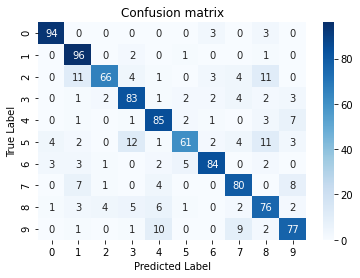

In [23]:
plot_confusion_matrix(confusion_matrix(y_hund, y_tilde2, labels=[0,1,2,3,4,5,6,7,8,9]) , classes = [0,1,2,3,4,5,6,7,8,9])